In [49]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [42]:
loaded_data = datasets.load_iris()
data = loaded_data.data

In [43]:
data.shape

(150, 4)

In [40]:
# 零均值化，和求各列均值
def zero_mean(data):
    mean_val = np.mean(data, axis=0) #按列求均值，求各个特征的均值
    new_data = data - mean_val
    return new_data, mean_val

# 求满足百分比的前n个特征值得个数，返回n的值
def percent2n(eigVals, percent):
    sortArray = np.sort(eigVals) # 升序
    sortArray = sortArray[-1::-1] # 反转
    arraySum = sum(sortArray)
    tmp = 0
    num = 0
    for i in sortArray:
        tmp += i
        num += 1
        if tmp / arraySum >= percent:
            return num

def PCA(data, percent=0.99):
    new_data, mean_val = zero_mean(data)
    covMat = np.cov(new_data, rowvar=0) # 求协方差矩阵
    
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    if type(percent) == float:
        n = percent2n(eigVals, percent)
    elif type(percent) == int:
        n = percent
    else:
        raise Exception("percent should be int or float")
        
    index_eigVals = np.argsort(eigVals)
    index_eigVects = index_eigVals[-n:][::-1]
    n_eigVect = eigVects[:, index_eigVects]
    low_data = new_data * n_eigVect
    recon_data = (low_data * n_eigVect.T) + mean_val
    return low_data, recon_data

In [55]:
low_data, recon_data = PCA(data, 2)

In [56]:
low_data[:,0].shape

(150, 1)

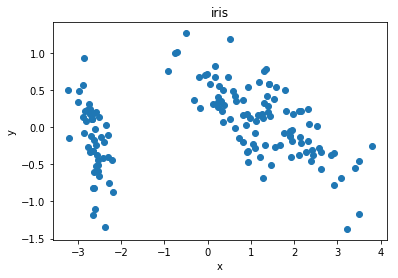

In [57]:
plt.scatter(list(low_data[:,0]), list(low_data[:,1]))
plt.xlabel("x")
plt.ylabel("y")
plt.title("iris")
plt.show()